<h1>AirBnB &amp; Zillow Data Challenge<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Business-Problem" data-toc-modified-id="Business-Problem-1">Business Problem</a></span></li><li><span><a href="#Overall-Assumptions" data-toc-modified-id="Overall-Assumptions-2">Overall Assumptions</a></span></li><li><span><a href="#1.-Import-Required-Packages" data-toc-modified-id="1.-Import-Required-Packages-3">1. Import Required Packages</a></span></li><li><span><a href="#2.-Loading-Data" data-toc-modified-id="2.-Loading-Data-4">2. Loading Data</a></span></li><li><span><a href="#3.-Revenue-Analysis(AirBnB-Data-Set)" data-toc-modified-id="3.-Revenue-Analysis(AirBnB-Data-Set)-5">3. Revenue Analysis(AirBnB Data Set)</a></span><ul class="toc-item"><li><span><a href="#Assumptions" data-toc-modified-id="Assumptions-5.1">Assumptions</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-5.2">Data Preparation</a></span></li><li><span><a href="#Quality-Check-&amp;-Data-Cleaning" data-toc-modified-id="Quality-Check-&amp;-Data-Cleaning-5.3">Quality Check &amp; Data Cleaning</a></span></li><li><span><a href="#Occupancy-Rate-Definition" data-toc-modified-id="Occupancy-Rate-Definition-5.4">Occupancy Rate Definition</a></span></li><li><span><a href="#Revenue-Calculation" data-toc-modified-id="Revenue-Calculation-5.5">Revenue Calculation</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-5.6">Data Visualization</a></span></li></ul></li><li><span><a href="#4.-Cost-Analysis(Zillow-Data-Set)" data-toc-modified-id="4.-Cost-Analysis(Zillow-Data-Set)-6">4. Cost Analysis(Zillow Data Set)</a></span><ul class="toc-item"><li><span><a href="#Assumptions" data-toc-modified-id="Assumptions-6.1">Assumptions</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-6.2">Data Preparation</a></span></li><li><span><a href="#Quality-Check-&amp;-Data-Manipulation" data-toc-modified-id="Quality-Check-&amp;-Data-Manipulation-6.3">Quality Check &amp; Data Manipulation</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-6.4">Data Visualization</a></span></li></ul></li><li><span><a href="#5.-Profitability-Analysis" data-toc-modified-id="5.-Profitability-Analysis-7">5. Profitability Analysis</a></span><ul class="toc-item"><li><span><a href="#Annual-Return-Rate" data-toc-modified-id="Annual-Return-Rate-7.1">Annual Return Rate</a></span></li><li><span><a href="#Breakeven-Time" data-toc-modified-id="Breakeven-Time-7.2">Breakeven Time</a></span></li><li><span><a href="#Result-Summary" data-toc-modified-id="Result-Summary-7.3">Result Summary</a></span></li></ul></li><li><span><a href="#6.-Investment-Recommendation" data-toc-modified-id="6.-Investment-Recommendation-8">6. Investment Recommendation</a></span></li><li><span><a href="#7.-What's-Next" data-toc-modified-id="7.-What's-Next-9">7. What's Next</a></span></li></ul></div>


 **_Ricci Lu_**
***
## Business Problem
The real estate company has a niche in investing the 2-bedroom properties in New York City to rent out these properties short-term as a business strategy. In this case, the company wants to identify the most profitable properties based on zip codes in New York City. This project aims to analyze house price data from Zillow as cost and price listing data from AirBnB as revenue to generate profit of zip codes. In conclusion, the investment decision is based on which zip code in New York City has the most profit. Zip code with the best profitability will be the optimal investment target for the real estate company.


***
## Overall Assumptions

**General Assumptions:**
*  The investor will pay for the property in cash (i.e. no mortgage/interest rate will need to be accounted for).
*  The time value of money discount rate is 0% (i.e. $1 today is worth the same 100 years from now).
*  All properties and all square feet within each locale can be assumed to be homogeneous.
*  The cost is the home value (i.e. no other tax rate or property management fee needs to be considered).

**Assumptions on AirBnB data:**
*  Only zip codes that have more than 10 listings on AirBnB are eligible to calculate profitability with sufficient data.
*  Assume each listing has its own occupancy rate. The occupancy rate is based on each listing's review index, which is calculated by multiplying number of reviews the host received per month by its overall review score. A higher review index means the listing is more popular and then its occupancy rate will be higher.
*  Assume the occupancy rate for listings is between 0.70 and 0.80, and listings with higher review index have higher occupancy rate. The review index is scaled into an occupancy rate range between 0.70 and 0.80 by using MinMaxScaler to reflect the different occupancy rates based on the review index.
*  Assume the generated occupancy rate in this project only applies to AirBnB listings with normal price. The assumption of occupancy rate does not apply to listings with extremely high/low price outside the IQR range. Therefore, the listings with abnormal price(outliers) within each zip code are removed.
*  Newly Posted Listings:
 * listings that have updated availability within a month without first review and last review
 * listings that have the first review just within 30 days after the scraped date
*  Newly posted listings are removed since they do not have sufficient review index to define occupancy rate.
*  For 2-bedroom listings that are 'private room' type, assume the corresponding price of the entire 2-bedroom apartments is twice as the current daily price.
*  Assume 70% of reservations are booked with daily price, 20% of reservations are booked with weekly price and 10% of reservations are booked with monthly price only when the host offers discount. Otherwise, occupants will choose to pay daily price instead.
*  The formula of calculating annual revenue for each listings:  
Revenue = 365(days) ✖ Occupancy Rate ✖ (Daily Proportion ✖ Daily Price + Weekly Proportion ✖ (Weekly Price/7) + Monthly Proportion ✖ (Monthly Price/30))
*  Assume the host may block the listing for an unknown period. Therefore, availability data is not considered for analysis since availability cannot accurately reflect how many days that the listing is booked.  
*  Assume the annual revenue generated from the AirBnB data set is the average annual revenue in the following years.

**Assumptions on Zillow data:**
*  Assume the latest home value in June 2017 as the latest cost for AirBnB listings after home value growth trend analysis.
*  Assume the home values in adjacent zip code area are similar. This assumption is used to calculate coordinate distance and impute missing home value in some zip codes.

***
## 1. Import Required Packages

In [1]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import geopy.distance
from geopy.geocoders import Nominatim
from sklearn.preprocessing import minmax_scale
from scipy.stats import ttest_ind
from warnings import filterwarnings
filterwarnings('ignore')


***
## 2. Loading Data 

**Basic Data**
*  Zillow Data(Zip_Zhvi_2bedroom.csv)
*  AirBnB Data(listings.csv)

**External Data**
*  zip code with its neighborhood and borough information(zipcode_neighborhood.xlsx), which is used for regional home value analysis and imputing missing home values.   
  [source: https://www.unitedstateszipcodes.org/ ]
*  center coordinate of zip codes in New York City(zip_code_database.csv), which is used to calculate coordinate distance and impute missing home value in some zip codes.  
  [source: https://www.unitedstateszipcodes.org/zip-code-database/ ]

In [2]:
os.chdir('C://Users//ricci//Desktop//Capital One//Data Challenge')
cost = pd.read_csv('Zip_Zhvi_2bedroom.csv')
listing = pd.read_csv('listings.csv',low_memory=False)

#import data about zipcode's neighborhood and borough information
zipcode_neighbor=pd.read_excel('zipcode_neighborhood.xlsx')

#import data about center coordinate of zipcodes in New York City
zipcode_crd=pd.read_csv('zip_code_database.csv')

***  

## 3. Revenue Analysis(AirBnB Data Set)

AirBnB provides us the host information, house information, rental price and review information based on each listing.

### Assumptions
1. Only zip codes that have more than 10 listings on AirBnB are eligible to calculate profitability with sufficient data.
2. Assume each listing has its own occupancy rate. The occupancy rate is based on each listing's review index, which is calculated by multiplying number of reviews the host received per month by its overall review score. A higher review index means the listing is more popular and then its occupancy rate will be higher.
3. Assume the occupancy rate for listings is between 0.70 and 0.80, and listings with higher review index have higher occupancy rate. The review index is scaled into an occupancy rate range between 0.70 and 0.80 by using MinMaxScaler to reflect the different occupancy rates based on the review index.
4. Assume the generated occupancy rate in this project only applies to AirBnB listings with normal price. The assumption of occupancy rate does not apply to listings with extremely high/low price outside the IQR range. Therefore, the listings with abnormal price(outliers) within each zip code are removed.
5. Newly Posted Listings:   
  *  listings that have updated availability within a month without first review and last review  
  *  listings that have the first review just within 30 days after the scraped date
6. Newly posted listings are removed since they do not have sufficient review index to define occupancy rate.
7. For 2-bedroom listings that are 'private room' type, assume the corresponding price of the entire 2-bedroom apartments is twice as the current daily price.
8. Assume 70% of reservations are booked with daily price, 20% of reservations are booked with weekly price and 10% of reservations are booked with monthly price only when the host offers discount. Otherwise, occupants will choose to pay daily price instead.
9. The formula of calculating annual revenue for each listings:  
  Revenue = 365(days) ✖ Occupancy Rate ✖ (Daily Proportion ✖ Daily Price + Weekly Proportion ✖ (Weekly Price/7) + Monthly Proportion ✖ (Monthly Price/30))
10. Assume the host may block the listing for an unknown period. Therefore, availability data is not considered for analysis since availability cannot accurately reflect how many days that the listing is booked.
11. Assume the annual revenue generated from the AirBnB data set is the average annual revenue in the following years.



*** 

### Data Preparation
*  Variable Selection:
  * last_scraped
  * zipcode
  * latitude
  * longitude
  * room_type
  * bedrooms
  * price
  * weekly_price
  * monthly_price
  * calendar_updated
  * number_of_reviews
  * first_review
  * last_review
  * review_scores_rating
  * reviews_per_month
*  Filtered only listings that have 2 bedrooms.
*  Filtered newly posted listings based on assumption 5 and assumption 6.
*  Removed 2-bedroom listings of 'private room' type based on t-test statistic result between price of 'private room' listings and price of 'Entire home/apt' listings.
*  Filtered zipcodes that have more than 10 listings based on assumption 1.

In [3]:
#Varibale Selection
revenue_NY=listing.loc[:,['zipcode','room_type','latitude','longitude','calendar_updated','bedrooms','last_scraped',
                     'price','weekly_price','monthly_price','first_review','last_review',
                     'number_of_reviews','review_scores_rating','reviews_per_month']]

**select listings that have 2 bedrooms and remove newly posted listings based on the assumption 5 and assumption 6**

In [4]:
def clean_listing(data):
    
    #Filtered only listings that have 2 bedrooms
    data=data[data['bedrooms']==2]
    
    #Select listings that do not have first review and last review
    data1=data[(pd.isnull(data['first_review']))&(pd.isnull(data['last_review']))]
    #Rule out listings that have updated availability only within a month from the selected data above
    cut_index=[]
    for i in data1.index:
        if data1.loc[i]['calendar_updated'] in ['never','1 week ago','2 days ago','2 weeks ago','3 days ago','3 weeks ago','4 days ago' ,'4 weeks ago','5 days ago','6 days ago','a week ago','today','yesterday']:
            cut_index.append(i)
        else:
            continue
    data=data.drop(cut_index)
    data=data.reset_index(drop=True)
    
    #Rule out listings that have first review less than 30 days after the scraped date
    datediff=pd.DataFrame([i.days for i in (pd.to_datetime(data['last_scraped'])-pd.to_datetime(data['first_review']))])
    data=data[datediff.iloc[:,0]>30]
    data=data.reset_index(drop=True)
    data=data.drop(['last_scraped','first_review','bedrooms','calendar_updated','last_review'],axis=1)
    return(data)

revenue_NY=clean_listing(revenue_NY) 

**remove listings that are 'private room' type**  


**Step1:**  

Get the price of 2-bedroom listings based on private room type and entire apartment type.  
*  There are special characters in ['price','weekly_price','monthly_price'] columns. The special characters are removed in this step for converting price columns into numeric type.    
*  Calculate the entire apartmant price of 2-bedroom with 'private room' type based on assumption 7. For 2-bedroom listings that are 'private room' type, assume the corresponding price of the entire 2-bedroom apartments is twice as the current daily price.

**Step2:**  
   
Apply t-test to compare the price between private room type and entire apartment type.   

In [5]:
def clean_dollarsign(data):
    data=data.str.replace("$","")
    data=data.str.replace(" ","")
    data=data.str.replace(",","")
    return(data)  
for i in ['price','weekly_price','monthly_price']:
    revenue_NY[i]=pd.to_numeric(clean_dollarsign(revenue_NY[i]))

In [6]:
#1
#For 'private room' type listing, multiply the price by 2 to calculate its corresponding entire apartment price
private_price=(pd.to_numeric(revenue_NY[revenue_NY['room_type']=='Private room']['price']))*2
#Get the price of 2-bedroom listings with entire apartment type
entire_price=(pd.to_numeric(revenue_NY[revenue_NY['room_type']=='Entire home/apt']['price']))

#2
#Calculate the t-test for the means of prices from two room types.
ttest_ind(private_price,entire_price)

Ttest_indResult(statistic=5.0983920912732135, pvalue=3.553310358894921e-07)

The p-value is 3.553310358894921e-07.   
The t-test result shows that the prices of these two room types are significantly different. In order to calculate profitability of 2-bedroom properties, 2-bedroom listings with 'private room' type are removed.

In [7]:
def remove_private(data):
    data=data[data['room_type']=='Entire home/apt']
    data=data.drop('room_type',axis=1)
    return data
revenue_NY=remove_private(revenue_NY)

**filter zipcodes that have more than 10 listings based on assumption1**

In [8]:
#missing value check
revenue_NY['zipcode'].isnull().sum()

36

The current data set has 36 missing zip codes. The next step is to impute the missing value by using geopy package to impute the zip code based on latitude and longitude.

In [9]:
#impute missing zip code
def fill_zipcode(data):
    geolocator = Nominatim()
    index1=data[data['zipcode'].isnull()].index.tolist()
    for i in index1:
        data.loc[i,'zipcode']=geolocator.reverse([data.loc[i]['latitude'],data.loc[i]['longitude']], timeout = 10, exactly_one=True).raw['address']['postcode']
    return(data)
revenue_NY=fill_zipcode(revenue_NY)

After imputing the missing zip code, filter zipcodes that have more than 10 listings.

In [10]:
def select_count(data):
    data['count'] = data.groupby('zipcode')['zipcode'].transform('count')
    data=data.loc[data['count']>10,]
    data=data.drop(['count'],axis=1)
    return data
revenue_NY=select_count(revenue_NY)

*** 

### Quality Check & Data Cleaning

**Restate Assumptions:**
*  Assume each listing has its own occupancy rate. Occupancy rate is based on each listing's review index, which is calculated by multiplying the host's number of reviews per month by the listing's overall review score.
*  Assume the generated occupancy rate in this project only applies to AirBnB listings with normal price. The assumption of occupancy rate does not apply to listings with extremely high/low price outside the IQR range. Therefore, the listings with abnormal value(outliers) in each zipcode are removed.


**Data Cleaning**
*  There are special characters in ['price','weekly_price','monthly_price'] columns. This problem has been addressed in the previous step of filtering out listings with 'private room' type.  
*  There are 36 missing zip codes after data cleaning. This problem has been addressed in the previous step by using geopy package to impute zipcode based on latitude and longitude.  
*  There are 73 listings having number of review but missing review scores. Based on the assumption, the new derived column 'reviewindex' is calculated by multiplying host's number of reviews per month by the listing's overall review score. To maintain accuracy of the reviewindex for calculating occupancy rate, the listings with missing review score are removed.
*  There are 3632 missing values in monthly_price column and 3579 missing values in weekly_price column. Since all listings have daily price data, the missing values of monthly price and weekly price are imputed by 0.
*  184 listings have abnormally high/low prices within their zipcodes. Based on the assumption, listings with abnormal value(outliers) in each zipcode are removed.

In [11]:
#create the dataframe to list the number of missing data for each column
def count_missing(data):
    count_na=pd.DataFrame(columns={'column_name','missing_count'})
    count_na['column_name']=data.columns
    count_na['missing_count']=[data[i].isnull().sum() for i in data.columns]
    count_na=count_na.sort_values(by='missing_count',ascending=False)
    return count_na
count_missing(revenue_NY)

,missing_count,column_name
5,3632,monthly_price
4,3579,weekly_price
7,73,review_scores_rating
0,0,zipcode
1,0,latitude
2,0,longitude
3,0,price
6,0,number_of_reviews
8,0,reviews_per_month


**impute missing value of weekly price and monthly price by 0**

In [12]:
revenue_NY[['monthly_price','weekly_price']]=revenue_NY[['monthly_price','weekly_price']].fillna(0)

**filter out listings that do not have review_score_rating**

In [13]:
def filter_score(data):
    data=data.loc[~data['review_scores_rating'].isnull(),] 
    return data
revenue_NY=filter_score(revenue_NY)

**remove abnormal price of listings in each zipcode based on assumtion 7**

In [14]:
#find outliers based on each zipcode
def detect_outliers(data):
    outliers=pd.DataFrame()
    for i in set(data['zipcode']):
        zip1=data[data['zipcode']==i]
        Q1 = zip1['price'].quantile(0.25)
        Q3 = zip1['price'].quantile(0.75)
        IQR = Q3 - Q1
        filt = (zip1['price'] >= Q1 - 1.5 * IQR) & (zip1['price'] <= Q3 + 1.5 *IQR)
        outliers=pd.concat([outliers,zip1.loc[~filt]],axis=0) 
    return outliers
outliers=detect_outliers(revenue_NY)
outliers.shape

(184, 9)

In [15]:
revenue_NY=revenue_NY.drop(outliers.index)
revenue_NY.shape

(3948, 9)

After quality check and data cleaning, all missing value are imputed or removed for the next step of analysis. The revenue_NY data set contains 3948 observations from AirBnB listings.

***
### Occupancy Rate Definition

**Restate Assumptions:**
*  Assume each listing has its own occupancy rate. Occupancy rate is based on each listing's review index, which is calculated by multiplying number of reviews the host received per month by its overall review score. A higher review index means the listing is more popular and then its occupancy rate will be higher.
*  Assume the occupancy rate for listings with normal price is between 0.70 and 0.80 and listings with higher review index have higher occupancy rate. Therefore, the review index is scaled into an occpancy rate range between 0.70 and 0.80 to reflect different occupancy rates based on review index.


**Steps:**
1. Calculate review index   
**Review Index = Review Score ✖ Number of Reviews the Host Received Per Month**    
2. Convert review index into occupany rate  
Based on the assumption, the review index for each listing is scaled by using MinMaxScaler into the range between 0.70 and 0.80. A higher review index means the listing is more popular and then its occupancy rate will be higher.

**Step1: Calculate Review Index**

In [16]:
def reviewindex(data):
    reviewindex=[]
    reviewindex=data['review_scores_rating']*data['reviews_per_month']
    data['reviewindex']=reviewindex
    return data
revenue_NY=reviewindex(revenue_NY)

**Step2: Convert review index into occupany rate using MinMaxScaler**

In [17]:
def calculate_occupancy(data):
    occupancy_rate = minmax_scale(data['reviewindex'], feature_range=(0.7,0.8)) 
    data['occupancy_rate']=occupancy_rate
    return data
revenue_NY=calculate_occupancy(revenue_NY)

***

###  Revenue Calculation

**Restate Assumptions:**
*  Assume 70% of reservations are booked with daily price, 20% of reservations are booked with weekly price and 10% of reservations are booked with monthly price only when the host offers discount. Otherwise, occupants will choose to pay daily price instead.
*  Formula of calculating annual revenue for each listings:   
  Revenue = 365(days) ✖ Occupancy Rate ✖ (Daily Proportion ✖ Daily Price + Weekly Proportion ✖ (Weekly Price/7) + Monthly Proportion ✖ (Monthly Price/30))
  
**Steps:**
1. Based on the assumption, some listings have weekly price and monthly price without any discount. For weekly price that is higher than 7 times the daily price and monthly that is higher than 30 times the daily price, guests will choose to pay daily price instead. The unqualified weekly and monthly price without discount are replaced with 0.    
2.  Calculate annual return of listings using formula:   
Revenue = 365(days) ✖ Occupancy Rate ✖ (Daily Proportion ✖ Daily Price + Weekly Proportion ✖ (Weekly Price/7) + Monthly Proportion ✖ (Monthly Price/30))     
If there is no weekly price or monthly price, the proportion will be added into the other two proportions evenly.

**Step1: Replace weekly price and monthly price without discount with 0**

In [18]:
#calculate average annual revenue for each zipcode
def clean_price(data):
    for i in range(len(data)):
        if data.iloc[i]['price']*7<=data.iloc[i]['weekly_price']:
            data.loc[0,'weekly_price']=0
        if data.iloc[i]['price']*30<=data.iloc[i]['monthly_price']:
            data.loc[0,'monthly_price']=0
    data[['weekly_price','monthly_price']]=data[['weekly_price','monthly_price']].fillna(0)
    return data 
revenue_NY=clean_price(revenue_NY)

**Step2: Calculate annual return of listings**

In [19]:
def revenue(data):    
    annualrevenue=[]
    for i in range(len(data)):
        if data.iloc[i]['weekly_price']==0 and data.iloc[i]['monthly_price']==0:
            annualrevenue.append(data.iloc[i]['occupancy_rate']*365*data.iloc[i]['price'])
        elif data.iloc[i]['weekly_price']!=0 and data.iloc[i]['monthly_price']==0:
            annualrevenue.append(data.iloc[i]['occupancy_rate']*365*((0.75*data.iloc[i]['price'])+(0.25*data.iloc[i]['weekly_price']/7)))
        elif data.iloc[i]['weekly_price']==0 and data.iloc[i]['monthly_price']!=0:
            annualrevenue.append(data.iloc[i]['occupancy_rate']*365*((0.80*data.iloc[i]['price'])+(0.20*data.iloc[i]['monthly_price']/30)))
        elif data.iloc[i]['weekly_price']!=0 and data.iloc[i]['monthly_price']!=0:
            annualrevenue.append(data.iloc[i]['occupancy_rate']*365*((0.70*data.iloc[i]['price'])+(0.20*data.iloc[i]['weekly_price']/7)+(0.10*data.iloc[i]['monthly_price']/30)))
    data['annual_revenue']=annualrevenue
    return data 
revenue_NY=revenue(revenue_NY)

**Calculate average revenue based on zipcode**

In [20]:
def mean_revenue(data):
    return(pd.DataFrame(data.groupby('zipcode')['annual_revenue'].mean()).rename(columns={'annual_revenue':'revenue'}))
mean_revenue=mean_revenue(revenue_NY)
mean_revenue.shape

(75, 1)

After data preparation, data cleaning and data manipulation, the revenue_NY data set has occupancy rate, review index and annual revenue data for the listings in 75 zipcodes in New York City.

*** 

### Data Visualization

This part is to identify the listing price difference on AirBnB based on geographical factor and create business insights about which area has higher/lower listing price and review index.

*  analyze AirBnB listing pirce based on neighborhood and borough
*  analyze number of listings based on neighborhood and borough
*  analyze review index based on neighborhood and borough to measure popularity

In [21]:
#merge the revenue_NY with the neighborhood data to get the neighborhood/borough information for each zipcode
zipcode_neighbor['zipcode']=zipcode_neighbor['zipcode'].astype(str)
price_neighborhood=pd.merge(revenue_NY,zipcode_neighbor,left_on='zipcode',right_on='zipcode',how='inner')

In [22]:
#calculate the average price and number of listings for each neighborhood 
viz_neighborhood_1=pd.DataFrame(price_neighborhood.groupby('neighborhood')['price'].mean())
viz_neighborhood_2=pd.DataFrame(price_neighborhood.groupby('neighborhood')['neighborhood'].count()).rename(columns={'neighborhood':'count'})
viz_neighborhood=pd.concat([viz_neighborhood_1,viz_neighborhood_2],axis=1)
viz_neighborhood=pd.merge(viz_neighborhood,zipcode_neighbor.iloc[:,1:].drop_duplicates(),left_index=True,right_on='neighborhood',how='inner')
viz_neighborhood=viz_neighborhood.sort_values(by='price',ascending=False).reset_index(drop=True)

Text(0.5, 1.0, 'Figure 1. Average Listing Price within Neighborhoods')

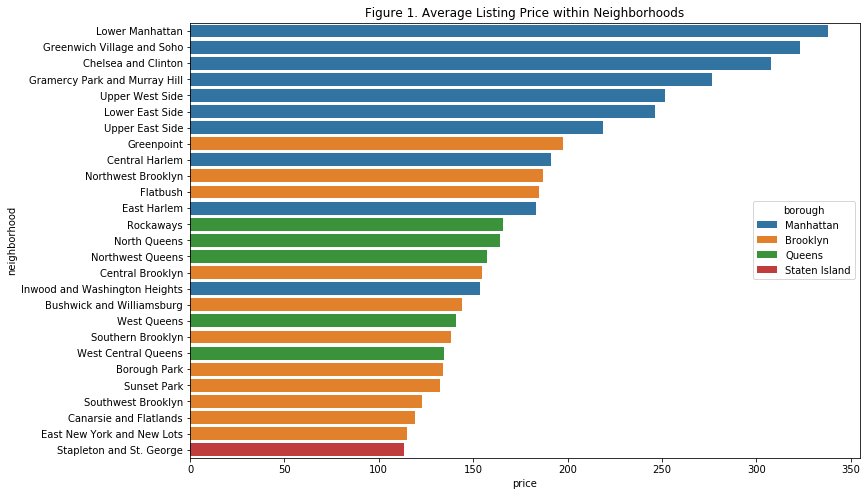

In [23]:
#visualize the average listing price based on each neighborhood
viz_neighborhood=viz_neighborhood.sort_values(by='price',ascending=False)
plt.figure(figsize=(12,8))
sns.barplot('price','neighborhood',hue='borough',data=viz_neighborhood,orient='h',linewidth=10, dodge=False).set_title('Figure 1. Average Listing Price within Neighborhoods')

The listing prices for different neighborhoods in Manhattan are significantly higher than listing prices in other boroughs. One possible reason is that the properties in Manhattan have higher home value and then AirBnB listings in Manhattan have higher price. The listing prices in Brooklyn are different based on which neighborhood the listing is located in. Staten Island has the lowest listing price.

Text(0, 0.5, 'Listing Price')

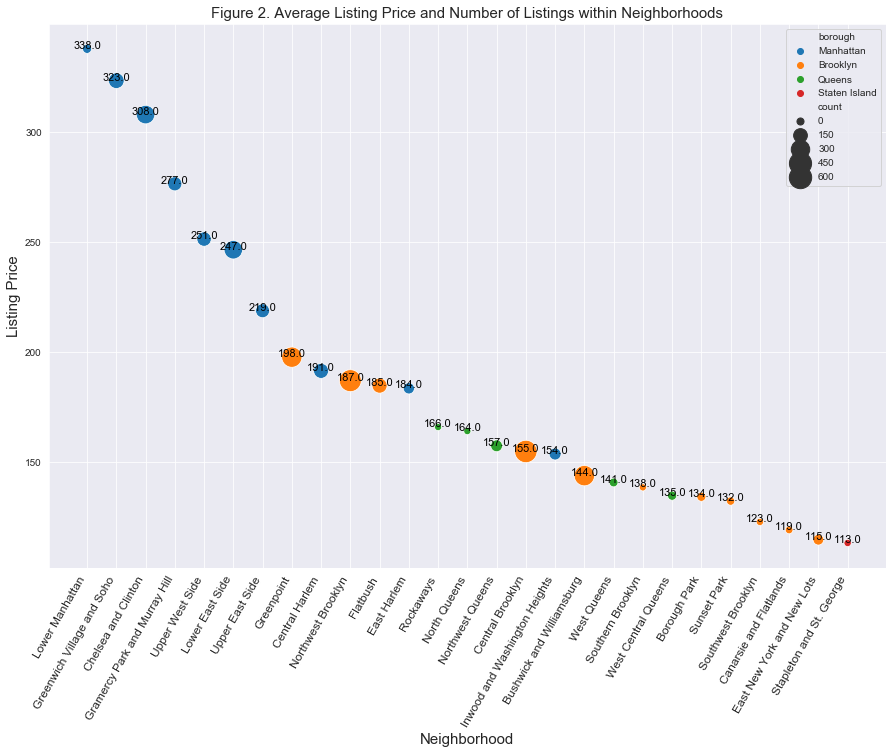

In [58]:
#visualize the average listing price and number of listings based on each neighborhood
plt.figure(figsize=(15,10))
plot_count_price=sns.scatterplot('neighborhood','price',size='count',hue='borough',data=viz_neighborhood,sizes=(50, 500))
plot_countprice=plt.setp(plot_count_price.get_xticklabels(), rotation=60, ha='right')
plot_count_price.set_title('Figure 2. Average Listing Price and Number of Listings within Neighborhoods', fontsize=15)
for index, row in viz_neighborhood.iterrows():
    plot_count_price.text(row.name,row.price,round(row.price,0), color='black',horizontalalignment='center',fontsize=11)
plt.xticks(fontsize=12)
plt.xlabel('Neighborhood', fontsize=15)
plt.ylabel('Listing Price', fontsize=15)

In the scatter plot, the size of bubbles represents the number of listing in each neighborhood. It shows that Manhattan and Brooklyn have Top 2 highest number of listings in New York City. However, the overall listing prices in Brooklyn are lower than the overall listings price in Manhattan.

In [25]:
#Visualize review index based on neighborhood and borough
viz_reviewindex=pd.DataFrame(revenue_NY.groupby('zipcode')['reviewindex'].mean())

viz_reviewindex=pd.merge(viz_reviewindex,zipcode_neighbor,left_index=True,right_on='zipcode',how='inner')
viz_reviewindex=viz_reviewindex.sort_values(by='reviewindex',ascending=False)

Text(0, 0.5, 'Review Index')

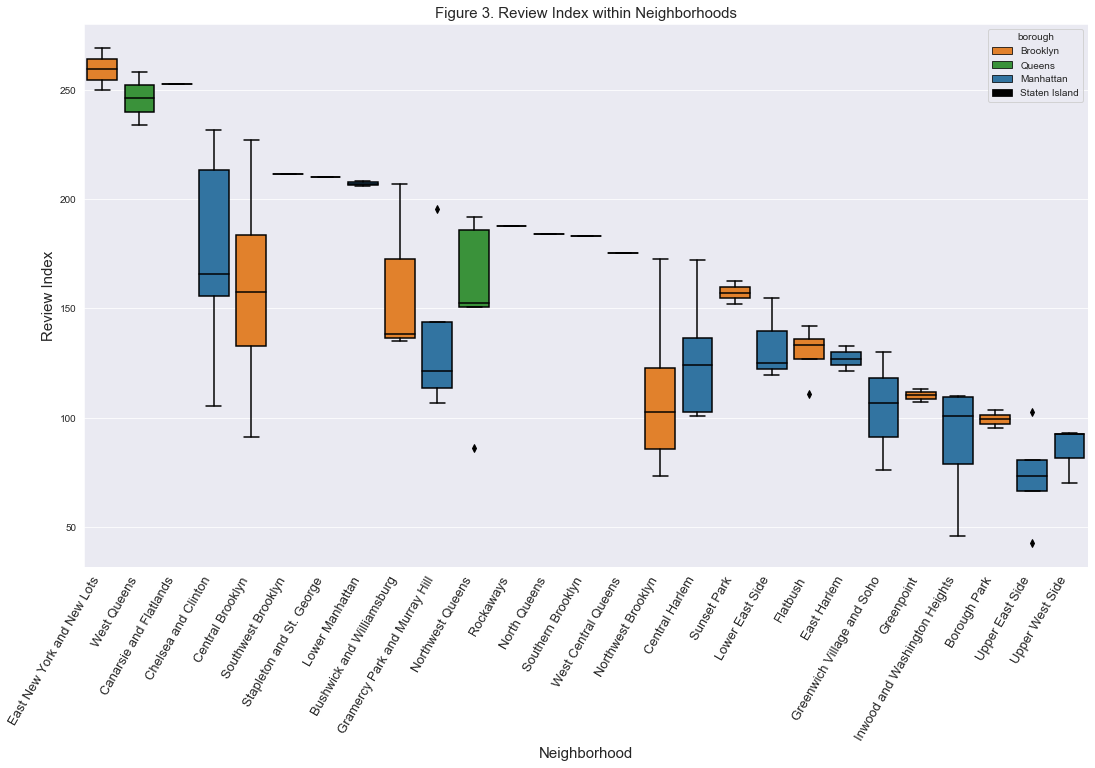

In [57]:
plt.figure(figsize=(18,10))
reviewindex_plot=sns.boxplot('neighborhood','reviewindex',hue='borough',data=viz_reviewindex,dodge=False,palette=["C1", "C2","C0", "k"])
reviewindex_plot_t=plt.setp(reviewindex_plot.get_xticklabels(), rotation=60, ha='right')
reviewindex_plot.set_title('Figure 3. Review Index within Neighborhoods', fontsize=15)
plt.xticks(fontsize=13)
plt.xlabel('Neighborhood', fontsize=15)
plt.ylabel('Review Index', fontsize=15)

In [27]:
revenue_NY['price'].corr(revenue_NY['reviewindex'])

-0.0061483347385928346

The box plot illustrates that Brooklyn has the highest overall review index, which means the listings in this borough has higher overall number of reviews and higher review scores. Combined with the previous plot about listing price, listings in Queens also have high review index but significantly lower listing price. We may conclude that staying in Queens is a popular option for AirBnB guests with more affordable price. For listings in Manhattan, Chelsea and Clinton is the neighborhood that has the highest review index.

*** 

## 4. Cost Analysis(Zillow Data Set)
Zillow provides us the median home value for two-bedroom properties among different cities and differnet states. The time frame is between April 1994 and June 2017.


### Assumptions
1. Assume the cost of each AirBnB listing is the home value (i.e. no other tax rate or property management fee needs to be considered).  
2. Assume the latest home value in June 2017 as the latest cost for AirBnB listings after home value growth trend analysis.  
3. Assume the home values in adjacent zipcode area are similar. This assumption is used to impute missing home value of some zipcodes.


***
### Data Preparation
*  Filtered home value from New York City in New York State.
*  Based on quality check, some zipcodes do not actually belong to New York City when Metro='New York' and State='NY'. Therefore, the cost data is filtered based on the City column rather than the Metro column.  
*  Variable Selection:  
  * RegionName(zipcode)
  * SizeRank
  * Monthly House Price(from April 1996 to June 2017)


In [28]:
def clean_cost(data):
    data=data[(cost['City']=='New York') & (cost['State']=='NY')]
    data=data.drop(['RegionID','City','State','Metro','CountyName'],axis=1)
    data=data.reset_index(drop=True)
    data['RegionName']=data['RegionName'].astype(str)
    return(data)
cost_NY=clean_cost(cost)
cost_NY.shape

(25, 257)

After filtering the data, there are 25 zipcodes in New York City having home value data.

***

### Quality Check & Data Manipulation

* Zillow only provides home value up to June 2017, while AirBnB provides the listing price in July 2019. Based on home value trend analysis, this project assumes the home value in June 2017 rather than the previous median/average home value as the cost of AirBnB listings.  
*  There are only 25 zipcodes in New York City having the home value data. However, AirBnB data contains listings in 75 zipcodes in New York City. This project uses two methods to impute 50 missing home value:  
 1. After measuring neighborhood's price coefficient of variation, impute zipcodes with missing home value by its neighborhood's average home value.  
 2. If missing value still exist after first step imputation, impute missing home value based on the average value of nearest three zipcodes. According to the assumption that the home values in adjacent zipcode area are similar, the three nearest zipcodes are identified by using geopy package to calculate the coordinate distance. 

**Visualize home value from 2013 to 2017 based on neighborhoods in New York City**

In [29]:
#House Price Trend in the last five years
def last_fiveyear_cost(data):
    last_five_year_cost=data.loc[:,data.columns[197:258]]
    last_five_year_cost.loc[:,'zipcode']=cost_NY.loc[:,cost_NY.columns[0]]
    #Calculate the average annul house price for each zip code
    year=['2013','2014','2015','2016','2017']
    for i in range(len(year)):
        last_five_year_cost.loc[:,year[i]]=[np.mean(last_five_year_cost.iloc[j,12*i:12*(i+1)]) for j in range(25)]
    last_five_year_cost=last_five_year_cost.loc[:,last_five_year_cost.columns[-6:]]

    cost_plot=pd.DataFrame(columns=['zipcode','year','price'])
    cost_plot['zipcode']=[str(i) for i in last_five_year_cost['zipcode']]*5
    cost_plot['year']=['2013']*25+['2014']*25+['2015']*25+['2016']*25+['2017']*25
    cost_plot['price']=[i for i in last_five_year_cost['2013']]+[i for i in last_five_year_cost['2014']]+[i for i in last_five_year_cost['2015']]+[i for i in last_five_year_cost['2016']]+[i for i in last_five_year_cost['2017']]
    return cost_plot

cost_plot=last_fiveyear_cost(cost_NY)

In [30]:
#group by neighborhood
zipcode_neighbor['zipcode']=zipcode_neighbor['zipcode'].astype(str)
cost_plot_group=pd.merge(cost_plot,zipcode_neighbor,left_on='zipcode',right_on='zipcode',how='inner')
cost_plot_group=cost_plot_group.groupby(['neighborhood','year']).agg({'price': 'mean'}).reset_index()

Text(38.94697420634921, 0.5, 'Home Value')

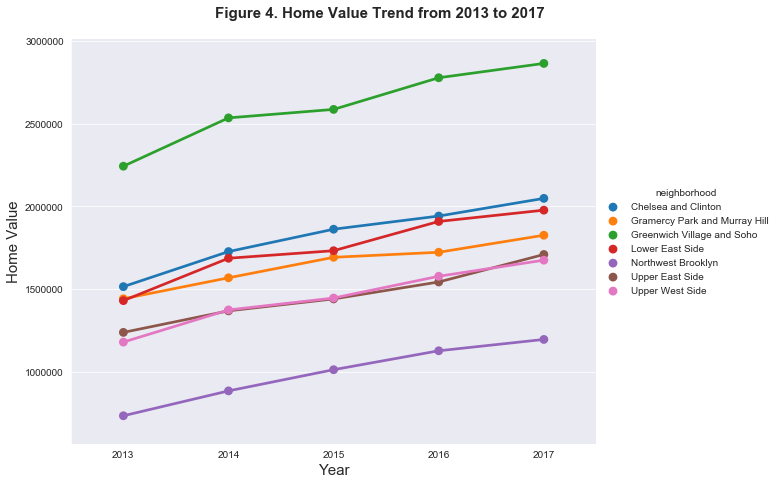

In [56]:
g=sns.catplot(x='year',y='price',hue='neighborhood',kind='point',data=cost_plot_group,height=2.5,aspect=3.5)
g.fig.set_size_inches(11,8)
g.fig.suptitle('Figure 4. Home Value Trend from 2013 to 2017',size=15,weight="bold")
plt.xlabel('Year', fontsize=15)
plt.ylabel('Home Value', fontsize=15)

The average home value in the 7 neighborhoods increased significantly from 2013 to 2017. Therefore, this project assumes the home value in June 2017(the latest data) rather than the previous median/average home value as the cost of AirBnB listings based on different zip codes.

**Define the home value in June 2017 as the cost**

In [32]:
def define_cost(data):
    data=data[['RegionName','2017-06']]
    data=data.rename(columns={'RegionName':'zipcode','2017-06':'cost'})
    return data
cost_NY=define_cost(cost_NY) 

**Impute missing house price**  
1.  After measuring neighborhood's home value coefficient of variation, impute zip codes with missing home value by its neighborhood's average home value.
2. If missing value still exist after the first step, impute missing home value based on the average value of nearest three zip codes. Nearest zip codes are identified by using geopy package to calculate the coordinate distance.

In [33]:
#merge Zillow data with zip code coordinates and the information of neighborhood
zipcode_crd['zipcode']=zipcode_crd['zipcode'].astype(str)
zipcode_neighbor['zipcode']=zipcode_neighbor['zipcode'].astype(str)
location_data=zipcode_crd.loc[:,['zipcode','Latitude','Longitude']]
zipcode_neighbor_crd=pd.merge(zipcode_neighbor,location_data,how='inner',left_on='zipcode',right_on='zipcode')
zipcode_neighbor_crd=pd.merge(zipcode_neighbor_crd,cost_NY,how='left',left_on='zipcode',right_on='zipcode')

**calculate neighborhood's home value coefficient of variation**

In [34]:
cost_std=zipcode_neighbor_crd.groupby('neighborhood')['cost'].std()
cost_std=cost_std.loc[~cost_std.isnull()].sort_values(ascending=True)

In [35]:
cost_mean=zipcode_neighbor_crd.groupby('neighborhood')['cost'].mean()
cost_mean=cost_mean.loc[~cost_mean.isnull()].sort_values(ascending=True)

In [36]:
cost_cv=pd.merge(cost_std,cost_mean,how='inner',left_index=True,right_index=True)
cost_cv['coefficient of variation']=cost_cv.iloc[:,0]/cost_cv.iloc[:,1]
cost_cv=cost_cv['coefficient of variation'].sort_values(ascending=True)
cost_cv

neighborhood
Upper East Side               0.086388
Northwest Brooklyn            0.118919
Greenwich Village and Soho    0.200855
Chelsea and Clinton           0.258844
Upper West Side               0.281513
Name: coefficient of variation, dtype: float64

The above result shows that Northwest Brooklyn and Upper East Side have significant lower coefficient of variation. Since the home values in Northwest Brooklyn and Upper East Side are more stable, the missing home values of zip codes in Northwest Brooklyn and Upper East Side are imputed by their neighborhood average home value.

In [37]:
def impute_cost_neighborhood(data):
    imputed=data[(data['neighborhood']=='Upper East Side') ^ (data['neighborhood']=='Northwest Brooklyn')]['cost'].fillna(data.groupby('neighborhood')['cost'].transform('mean'))
    for i in imputed.index:
        data.loc[i,'cost']=imputed[i]
    return data
cost_impute_neighborhood=impute_cost_neighborhood(zipcode_neighbor_crd)

**impute missing home value based on the average value of nearest three zipcodes**  
**nearest zipcodes are identified by using geopy package to calculate the coordinate distance**

In [38]:
#other missing values are filled with the average value of the nearest three zipcode
#coordinate distance is calculated by using geopy package
def impute_cost_nearby(data):
    have_cost=data[~(data['cost']).isnull()]
    no_cost=data[(data['cost']).isnull()]
    for i in range(len(no_cost)):
        distance=pd.DataFrame(columns=['zipcode','distance','house_price'])
        for j in range(len(have_cost)):
            #calculate the distance
            distance=distance.append({'zipcode':have_cost.iloc[j,0],'distance':geopy.distance.geodesic(no_cost.iloc[i,3:5], have_cost.iloc[j,3:5]),'house_price':have_cost.iloc[j,-1]},ignore_index=True)
        #sort the distance descendingly and then calculate the average home value of the nearest three zipcode
        distance.sort_values(by='distance',ascending=True,inplace=True)
        no_cost.iloc[i,-1]=np.mean(distance.iloc[0:3,-1])
        
        #append the imputed home value to be used for imputing the next missing home value
        have_cost=have_cost.append({'zipcode':no_cost.iloc[i,0],'neighborhood':no_cost.iloc[i,1],'borough':no_cost.iloc[i,2],'Latitude':no_cost.iloc[i,3],'Longitude':no_cost.iloc[i,4],'cost':no_cost.iloc[i,5]},ignore_index=True)
    have_cost=have_cost.drop(['Latitude','Longitude'],axis=1).sort_values(by='cost',ascending=False)
    return have_cost
all_imputed_cost=impute_cost_nearby(cost_impute_neighborhood)

After data preparation and data manipulation, all missing home values are imputed. The all_imputed_cost data set contains home value in 75 zipcodes as the cost for AirBnB listings.

***

### Data Visualization  
* analyze home value based on neighborhood and borough

In [39]:
#calculate average home value based on neighborhood
cost_neighbor=pd.DataFrame(all_imputed_cost.groupby('neighborhood')['cost'].mean())
cost_neighbor=pd.merge(cost_neighbor,zipcode_neighbor.iloc[:,1:].drop_duplicates(),left_index=True,right_on='neighborhood',how='inner')
cost_neighbor=cost_neighbor.sort_values(by='cost',ascending=False).reset_index(drop=True)

In [40]:
#plt.figure(figsize=(12,7))
#cost_plot_neighbor=sns.barplot('neighborhood','cost',hue='borough',order=cost_neighbor['neighborhood'],data=cost_neighbor,linewidth=10, dodge=False,ci=None)
#cost_plot_neighbor_t=plt.setp(cost_plot_neighbor.get_xticklabels(), rotation=60, ha='right')
#cost_plot_neighbor.set_title('Figure 5. Average Home Value in Neighborhood')

Text(0.5, 1.0, 'Figure 5. Average Home Value in Neighborhood')

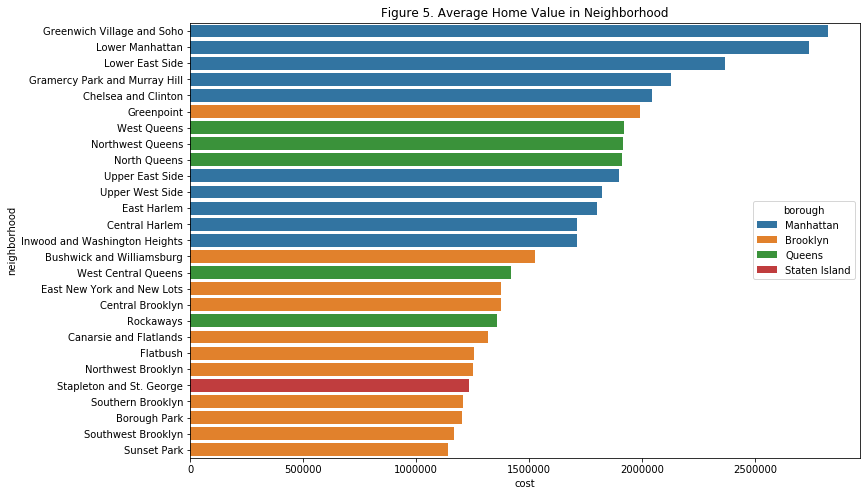

In [41]:
plt.figure(figsize=(12,8))
sns.barplot('cost','neighborhood',hue='borough',data=cost_neighbor,orient='h',linewidth=10, dodge=False).set_title('Figure 5. Average Home Value in Neighborhood')

In [42]:
neighbor_corr=pd.merge(viz_neighborhood_1,cost_neighbor,left_on='neighborhood',right_on='neighborhood',how='inner')
neighbor_corr['price'].corr(neighbor_corr['cost'])

0.837256206891593

After imputing the missing home value in some zip codes, it is obvious that the home values in Manhattan are the highest. The home values in Brooklyn are lower than home values in Manhattan and Queens. Based on Figure 5 and Figure 2, we can also see that the average AirBnB listing price in some neighborhoods in Brooklyn are lower since the average home values in these areas are lower as well. 

***
## 5. Profitability Analysis  

**Assumptions**  
1. Assume the annual revenue generated from the AirBnB data set is the average annual revenue in the following years.
2. Assume the cost of each AirBnB listing is the home value (i.e. no other tax rate or property management fee needs to be considered).

***

There are two metrics to measure the profitability of the properties based on the home value as cost and rental revenue from AirBnB. 
*  Annual Return Rate:  
**Return Rate = Annual Revenue / Home Value** 
*  Breakeven Time:  
**Breakeven Time = Home Value / Annual Revenue** 


**Steps:**  

1. Calculate return rate for each listings   
2. Analyze average annual return rate based on zip code and select zip codes with top10 highest return rate   
3. Calculate breakeven time for each listing  
4. Analyze average breakeven time based on zip code and select zip codes with top10 shortest breakeven time

### Annual Return Rate

**calculate return rate for each listings**

In [43]:
def calculate_return(data1,data2):
    data1=data1.set_index('zipcode')
    data1.index=data1.index.astype(str)
    data2=data2.set_index('zipcode')
    result=pd.merge(data1,data2,how='inner',left_index=True,right_index=True)
    result['annualreturn']=result['annual_revenue']/result['cost']
    return result
returnrate_NY=calculate_return(revenue_NY,all_imputed_cost)

**calculate average return rate based on zip code**

In [44]:
def mean_return(data):
    data1=data.groupby('zipcode')['annualreturn'].mean()
    return(data1)
mean_return=mean_return(returnrate_NY)

**select zip codes with top10 highest return rate**

In [45]:
zipcode_neighbor['zipcode']=zipcode_neighbor['zipcode'].astype(str)
top10_return=pd.merge(pd.DataFrame(mean_return.sort_values(ascending=False)[:10]),zipcode_neighbor,how='inner',left_on='zipcode',right_on='zipcode')
top10_return

,zipcode,annualreturn,neighborhood,borough
0,11249,0.051182,Flatbush,Brooklyn
1,10017,0.046693,Gramercy Park and Murray Hill,Manhattan
2,10025,0.044459,Upper West Side,Manhattan
3,10001,0.042317,Chelsea and Clinton,Manhattan
4,10036,0.041565,Chelsea and Clinton,Manhattan
5,11215,0.041132,Northwest Brooklyn,Brooklyn
6,11217,0.039696,Northwest Brooklyn,Brooklyn
7,11231,0.039649,Northwest Brooklyn,Brooklyn
8,10019,0.039053,Chelsea and Clinton,Manhattan
9,10005,0.038891,Lower Manhattan,Manhattan


Text(0.5, 1.0, 'Figure 6. Zip Codes with Top 10 Highest Annual Return Rate')

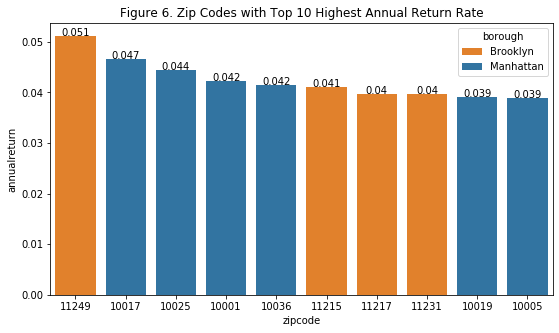

In [46]:
#visualization about annual return rate
plt.figure(figsize=(9,5))
return_barplot=sns.barplot('zipcode','annualreturn',hue='borough',order=top10_return['zipcode'],data=top10_return,linewidth=10, dodge=False,ci=None, palette=["C1", "C0"])
for index, row in top10_return.iterrows():
    return_barplot.text(row.name,row.annualreturn,round(row.annualreturn,3), color='black', ha="center")
return_barplot.set_title('Figure 6. Zip Codes with Top 10 Highest Annual Return Rate')

The result illustrates that zip codes with top 10 return rate are in Brooklyn or Manhattan.  
The zip code with the highest annual return rate is '11249' in Flatbush, Brooklyn with 5.12% annual return rate.

### Breakeven Time

**calculate breakeven time for each listing**

In [47]:
def calculate_return(data1,data2):
    data1=data1.set_index('zipcode')
    data1.index=data1.index.astype(str)
    data2=data2.set_index('zipcode')
    result=pd.merge(data1,data2,how='inner',left_index=True,right_index=True)
    result['breakeven']=result['cost']/result['annual_revenue']
    return result
breakeven_NY=calculate_return(revenue_NY,all_imputed_cost)

**select zip codes with top10 shortest breakeven time**

In [48]:
def mean_breakeven(data):
    data1=data.groupby('zipcode')['breakeven'].mean()
    return(data1)
mean_breakeven=mean_breakeven(breakeven_NY)

In [49]:
zipcode_neighbor['zipcode']=zipcode_neighbor['zipcode'].astype(str)
top10_breakeven=pd.merge(pd.DataFrame(mean_breakeven.sort_values()[:10]),zipcode_neighbor,how='inner',left_on='zipcode',right_on='zipcode')
top10_breakeven

,zipcode,breakeven,neighborhood,borough
0,10017,21.737676,Gramercy Park and Murray Hill,Manhattan
1,11249,22.880881,Flatbush,Brooklyn
2,10005,25.758836,Lower Manhattan,Manhattan
3,11215,26.154328,Northwest Brooklyn,Brooklyn
4,10025,27.409061,Upper West Side,Manhattan
5,11231,27.614353,Northwest Brooklyn,Brooklyn
6,10001,27.914882,Chelsea and Clinton,Manhattan
7,11217,28.120463,Northwest Brooklyn,Brooklyn
8,11205,28.641054,Northwest Brooklyn,Brooklyn
9,10036,28.758589,Chelsea and Clinton,Manhattan


Text(0.5, 1.0, 'Figure 7. Zip Codes with Top 10 Shortest Breakeven Time')

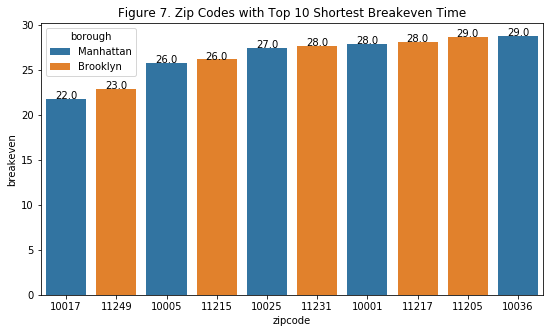

In [50]:
#visualization about breakeven time
plt.figure(figsize=(9,5))
breakeven_barplot=sns.barplot('zipcode','breakeven',hue='borough',order=top10_breakeven['zipcode'],data=top10_breakeven,linewidth=10, dodge=False,ci=None, palette=["C0", "C1"])
for index, row in top10_breakeven.iterrows():
    breakeven_barplot.text(row.name,row.breakeven,round(row.breakeven,0), color='black', ha="center")
breakeven_barplot.set_title('Figure 7. Zip Codes with Top 10 Shortest Breakeven Time')

The breakeven analysis shows that zip codes with top10 minimum breakeven year are located in Manhattan or Brooklyn.  
Zip code of '10017' in Manhattan has the minimum breakeven time with 22 years.

### Result Summary

Based on annual return rate and breakeven time, the zip code having the best profitability is either zip code '10017' in Manhattan or zip code '11249' in Brooklyn. Zip code of '10017' has higher return rate while zip code of '11249' has less breakeven time. To select the most suitable zip code area, there are still other factors such as average home value and review index can be considered to compare these two zip code area. 

***

## 6. Investment Recommendation  



Based on annual return rate and breakeven time, the zip code with the best profitability is either zip code'10017' (4.67%, 22 years) in Gramercy Park and Murray Hill, Manhattan or zip code '11249' (5.12%, 21years) in Flatbush, Brooklyn.   
In order to provide more substantial evidence, other factors such as average home value and average review index will be considered to make the final recommendation. From a risk management perspective, investing zip code area with less cost but higher growth potential is also important.

**Step:**
1. Combine data of additional factors such as  average home value, total number of monthly reviews, number of listings and average review index based on each zipcode.  
2. Visualize the data to compare top10 zip codes based on multiple factors.

**Calculate total number of monthly reviews, total number of listings and avaerage review index based on each zipcode**

In [51]:
#calculate average daily price and number of listings based on each zip code
def mean_daily(data):
    #calculate average listings price for each zipcode
    a=data.groupby('zipcode')['price'].mean()
    #assume count to be a popularity factor for each zipcode
    b=data.groupby('zipcode').size().rename('count')
    c=pd.merge(b,a,how='inner',left_index=True,right_index=True)
    c=c.rename(columns={'zipcode':'count'})
    return(c)
mean_daily=mean_daily(returnrate_NY)

#calculate total number of monthly reviews based on each zip code
def total_monthlyreview(data):
    return(data.groupby('zipcode')['reviews_per_month'].sum())
total_monthlyreview=total_monthlyreview(returnrate_NY)

#calculate average review index based on each zip code
def mean_reviewindex(data):
    return(data.groupby('zipcode')['reviewindex'].mean())
mean_reviewindex=mean_reviewindex(returnrate_NY)

#calculate average occupancy rate based on each zip code
def mean_occurate(data):
    return(data.groupby('zipcode')['occupancy_rate'].mean())
mean_occurate=mean_occurate(returnrate_NY)

In [52]:
#combine the data from additional factors
top10_data=pd.concat([mean_daily,total_monthlyreview,mean_reviewindex,mean_occurate,mean_revenue,mean_return,mean_breakeven],axis=1)

#combine average home value
top10_data=pd.merge(top10_data,all_imputed_cost,left_index=True,right_on='zipcode',how='inner')
top10_data=top10_data.sort_values(by='annualreturn',ascending=False).iloc[:10,:].reset_index(drop=True)
top10_data

,count,price,reviews_per_month,reviewindex,occupancy_rate,revenue,annualreturn,breakeven,zipcode,neighborhood,borough,cost
0,81,249.345679,113.00,133.827778,0.710974,64371.120531,0.051182,22.880881,11249,Flatbush,Brooklyn,1.257699e+06
1,31,360.612903,34.41,106.663226,0.708733,93130.936804,0.046693,21.737676,10017,Gramercy Park and Murray Hill,Manhattan,1.994558e+06
2,82,247.670732,81.52,92.749512,0.707585,63620.177407,0.044459,27.409061,10025,Upper West Side,Manhattan,1.431000e+06
3,36,347.777778,59.26,155.459444,0.712758,89433.112416,0.042317,27.914882,10001,Chelsea and Clinton,Manhattan,2.113433e+06
4,72,273.180556,129.15,165.596389,0.713594,71196.976900,0.041565,28.758589,10036,Chelsea and Clinton,Manhattan,1.712900e+06
5,147,171.496599,188.16,122.482109,0.710038,44043.711707,0.041132,26.154328,11215,Northwest Brooklyn,Brooklyn,1.070800e+06
6,94,202.372340,84.08,85.707660,0.707004,51695.573099,0.039696,28.120463,11217,Northwest Brooklyn,Brooklyn,1.302300e+06
7,68,186.426471,72.70,102.680588,0.708404,47694.006757,0.039649,27.614353,11231,Northwest Brooklyn,Brooklyn,1.202900e+06
8,99,288.838384,225.62,213.288788,0.717529,75712.148934,0.039053,29.807498,10019,Chelsea and Clinton,Manhattan,1.938719e+06
9,25,401.480000,53.56,205.785200,0.716910,105042.869454,0.038891,25.758836,10005,Lower Manhattan,Manhattan,2.700944e+06


**visualize zip code information by scatter plot**  
size:  reviewindex   
x_axis: zip code  
y_axis: home value(cost)

Text(0, 0.5, 'Home Value')

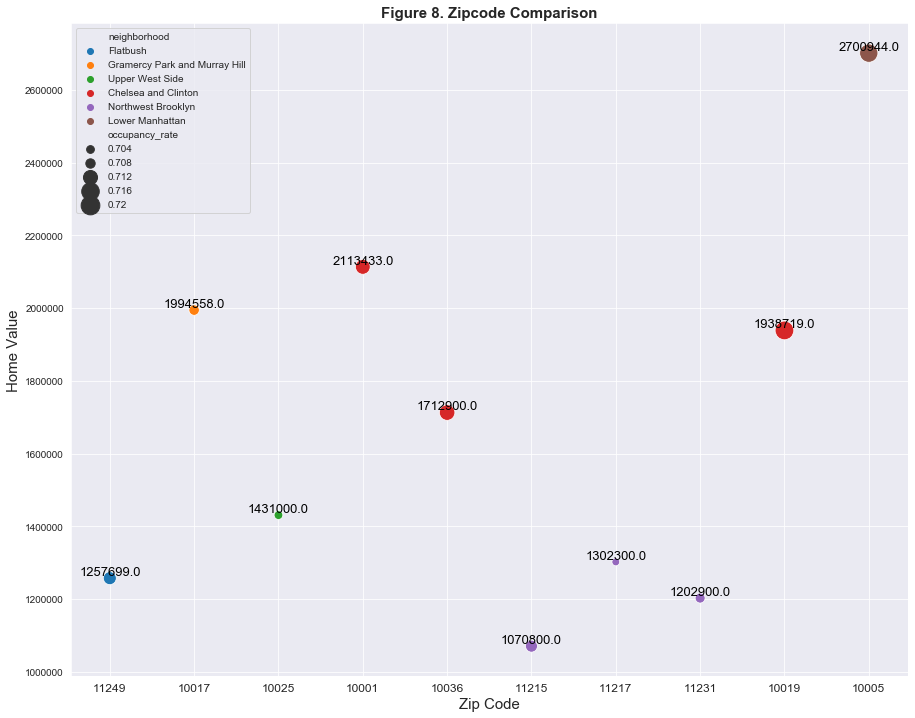

In [53]:
plt.figure(figsize=(15,12))
top10_plot=sns.set_style("darkgrid")
top10_plot=sns.scatterplot('zipcode','cost',size='occupancy_rate',hue='neighborhood',data=top10_data,sizes=(60,350))
top10_plot.set(xlabel='Zip Code',ylabel='Home Value')
top10_plot.set_title("Figure 8. Zipcode Comparison", weight="bold", fontsize=15)
for index, row in top10_data.iterrows():
    top10_plot.text(row.name,row.cost,round(row.cost,0), color='black', ha="center", va='bottom',fontsize=13)
plt.xticks(fontsize=12)
plt.xlabel('Zip Code', fontsize=15)
plt.ylabel('Home Value', fontsize=15)

In [54]:
import folium
import json
zipcode_data=pd.read_csv('zipcode_data.csv')

#read json file
filename = 'nyc-zip-code.json'
with open(filename, 'r') as f:
    nyc_zip_code = json.load(f)
    
#filter zipcodes that do not have information in this case
remove_index=[]
for i in range(len(nyc_zip_code.get('features'))):
    zipcode=nyc_zip_code.get('features')[i].get('properties').get('ZIP')
    if int(zipcode) not in list(zipcode_data['zipcode'].astype(str).astype(int)):
        remove_index.append(i)
    else:
        continue

new_nyc_zipcode=[]
for i in range(len(nyc_zip_code.get('features'))):
    if i in remove_index:
        continue
    else:
        new_nyc_zipcode.append(nyc_zip_code.get('features')[i])
        
json_nyc_zipcode={'features':new_nyc_zipcode,'type':'FeatureCollection'}


######visualization
zipcode_data=zipcode_data[['zipcode','annualreturn']]
zipcode_data['zipcode']=zipcode_data['zipcode'].astype(str)
m = folium.Map(location=[40.73, -74], zoom_start=10.5)
folium.Choropleth(
    geo_data=json_nyc_zipcode,
    data=zipcode_data,
    columns=['zipcode','annualreturn'],
    key_on='feature.properties.ZIP',
    #fill_color='red',
    fill_color='YlOrRd',
    fill_opacity=1,
    line_opacity=0.5,
    highlight=True,
    legend_name='Annual Return Rate'
).add_to(m)
folium.Marker([40.69, -73.99], 
               '11249').add_to(m) 
folium.Marker([40.75, -73.97], 
               '10017').add_to(m) 

m.save('NYC_zipcode.html')

**Final Recommendation**

The scatter plot shows that the home value of zip code 11249 is significantly lower than that of 10017. Based on the size of the bubbles, zip code '11249' has higher review index(number of reviews the host received per month * average review score) which means the 2-bedroom properties within this zip code are more popular on AirBnB than the zip code of '10017'. Compared to zip code 11249 in Flatbush Brooklyn, other zip codes may have higher review index. But these zip codes have higher average home value(cost) and generate less profit. From a risk management perspective, buying properties with higher cost will be riskier.  

In summary, the average home value in 11249 is lower than the average home value in most of the other potential investment target zip codes. More importantly, it generates the highest annual return rate. For the zip code 10017, it has the minimum breakeven time but it is not the best option when we consider other factors including average home value and review index. It costs more than $700,000 for the real estate company to buy 2-bedroom properties in zip code 10017. Higher home value will generate higher potential risk for the real estate company to invest in.   

After comparison, the final recommendation for the real estate company is to invest the 2-bedroom properties in 11249 located in Flatbush, Brooklyn which generates the most profit on short term rentals. Investing properties in this zip code will have approximately 5.12% annual return rate and breakeven time of 23 years. The average home value in this area is $1,257,699.


## 7. What's Next

Based on assumptions and the available data, this project comes up with the final recommendation of investing 2-bedroom properties in zip code '11249' can generate the most profit on short term rentals within New York City. However, the work that has been done so far can be improved in many dimensions to come up with a more comprehensive analysis. 

There are several possible improvements to inform a better decision:
1. Apply time series forecasting to predict the home value in July 2019. There are different methods such as building ARIMA model before removing the trend in time series data or applying the fbprophet package to forecast time series data. 
2. Home value trend is also an important factor to measure the profitability of zip codes. However, the Zillow data set in this project only contains home value in 25 zip codes. Therefore, analyzing more home value data in previous year is important for the investment decision. Investing properties with increasing home value generate more profit if the company decides to sell the properties in the future.  
3. The analysis does not consider the revenue growth rate each year. However, analyzing more AirBnB listing data in previous months and years can come up with the revenue annual growth rate to better calculate annual return rates and breakeven time.  

**Basic framework of building ARIMA time series model to predict home value**

In [55]:
from statsmodels.tsa.arima_model import ARIMA

#choose p,i,q based on minimum BIC statistic
def TS_model(rawdata):
    model=pd.DataFrame(columns=['zipcode','p','i','q'])  
    for i in rawdata.columns:
        data=rawdata[i].dropna()
        min_bic=ARIMA(data,order=(0,0,0)).fit().bic
        final_p=0
        final_q=0
        final_j=0
        for p in range(10):
            for q in range(1):
                for j in range(1):
                    mod=ARIMA(data,order=(p,j,q))
                    res=mod.fit()
                    bic=res.bic
                    if bic<min_bic:
                        min_bic=bic
                        final_p=p
                        final_q=q
                        final_j=j
                    else:
                        continue
        model=model.append({'zipcode': i,'p':final_p,'i':final_j,'q':final_q}, ignore_index=True)
    return model

def TS_forecast(rawdata):
    current_cost=pd.DataFrame(columns=['zipcode','2019-07'])
    for i in rawdata.columns[0:2]:
        data=rawdata[i].dropna()
        mod=ARIMA(data,order=(TS_model(data)[0],TS_model(data)[1],TS_model(data)[2]))
        pre=mod.fit().predict(start=1,end='2019-07')[-1]
        current_cost=current_cost.append({'zipcode': i,'2019-07':pre}, ignore_index=True)

#TS_forecast(cost_NY)